In [2]:
import scanpy as sc
import pandas as pd
pd.set_option('display.max_columns', 500)

In [19]:
dat_path="../data/OneK1K/Count.h5ad"
# dat_path = "../../jaxqtl/tests/data/Countdata.h5ad"
dat=sc.read_h5ad(dat_path)

## Explore count data (AnnData class)

In [20]:
dat.X.shape # sparse matrix: # 1248980 cells x 36571 genes

(1248980, 36571)

In [21]:
dat # different Views

AnnData object with n_obs × n_vars = 1248980 × 36571
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'donor_id', 'pool_number', 'predicted.celltype.l2', 'predicted.celltype.l2.score', 'age', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'cell_type_ontology_term_id_colors', 'default_embedding', 'schema_version', 'title'
    obsm: 'X_azimuth_spca', 'X_azimuth_umap', 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs'

In [14]:
# dat.obs # cells x cell features

In [22]:
dat.var # genes x gene features
dat.var['feature_name'].unique() # gene symbols name are unique

['MIR1302-2HG', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8', ..., 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB']
Length: 36571
Categories (36571, object): ['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', ..., 'bP-2171C21.3', 'bP-2189O9.5', 'hsa-mir-1253', 'hsa-mir-423']

In [40]:
dat.var['ensembl_id'] = dat.var.index

In [42]:
dat.var.set_index('feature_name', inplace=True)
dat.var.index

CategoricalIndex(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'RP11-34P13.7',
                  'RP11-34P13.8', 'RP11-34P13.14', 'RP11-34P13.13',
                  'RP11-34P13.9', 'AP006222.3', 'RP4-669L17.2',
                  ...
                  'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3',
                  'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB'],
                 categories=['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2ML1-AS1', 'A2ML1-AS2', ...], ordered=False, dtype='category', name='feature_name', length=36571)

In [23]:
dat.obs[['predicted.celltype.l2', 'cell_type']]

,predicted.celltype.l2,cell_type
barcode,,
AAACCTGAGAATGTTG-1,CD4 TCM,"central memory CD4-positive, alpha-beta T cell"
AAACCTGAGAGAACAG-1,NK,natural killer cell
AAACCTGAGCATGGCA-1,CD4 Naive,"naive thymus-derived CD4-positive, alpha-beta ..."
AAACCTGAGTATTGGA-1,CD8 TEM,"effector memory CD8-positive, alpha-beta T cell"
AAACCTGAGTGTCCCG-1,CD8 TEM,"effector memory CD8-positive, alpha-beta T cell"
...,...,...
TTTGTCATCCGCTGTT-9,B intermediate,transitional stage B cell
TTTGTCATCCGTTGTC-9,CD4 TCM,"central memory CD4-positive, alpha-beta T cell"
TTTGTCATCGCCGTGA-9,CD4 Naive,"naive thymus-derived CD4-positive, alpha-beta ..."


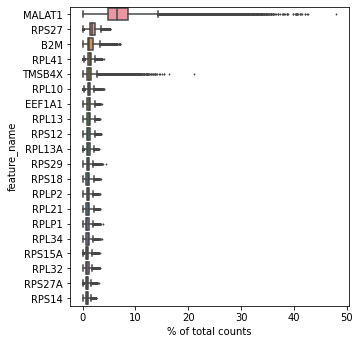

In [43]:
# Show those genes that yield the highest fraction of counts in each single cell, across all cells
sc.pl.highest_expr_genes(dat, n_top=20, )

In [51]:
dat.obs[['nFeature_RNA','nCount_RNA']]
dat.obs['nFeature_RNA'].describe().astype('int64')

count    1248980
mean         949
std          373
min          232
25%          690
50%          886
75%         1134
max         6862
Name: nFeature_RNA, dtype: int64

In [52]:
# start with: 11043 x 36571
# filter cells by min number of genes expressed (in place)
sc.pp.filter_cells(dat, min_genes=200)  # 1248980 cells x 36571 genes
dat.X.shape

/Users/zixuanzhang/miniconda3/envs/jaxqtl/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


(1248980, 36571)

In [54]:
# filter genes by min number of cells expressed (in place)
sc.pp.filter_genes(dat, min_cells=3)  # 1248980 cells × 28891 genes
dat.shape

In [57]:
dat.obs[['n_genes', 'nFeature_RNA']]

,n_genes,nFeature_RNA
barcode,,
AAACCTGAGAATGTTG-1,1256,1256
AAACCTGAGAGAACAG-1,941,941
AAACCTGAGCATGGCA-1,716,716
AAACCTGAGTATTGGA-1,1859,1859
AAACCTGAGTGTCCCG-1,992,992
...,...,...
TTTGTCATCCGCTGTT-9,1073,1073
TTTGTCATCCGTTGTC-9,1013,1013
TTTGTCATCGCCGTGA-9,919,919


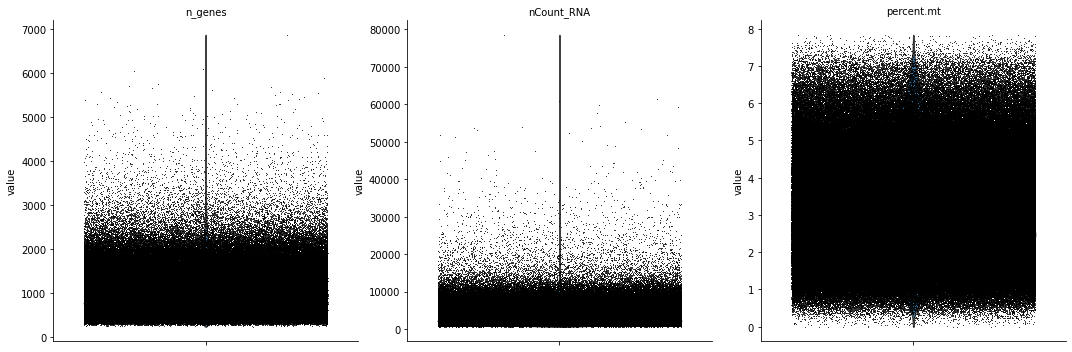

In [58]:
sc.pl.violin(dat, ['n_genes', 'nCount_RNA', 'percent.mt'],
             jitter=0.4, multi_panel=True)

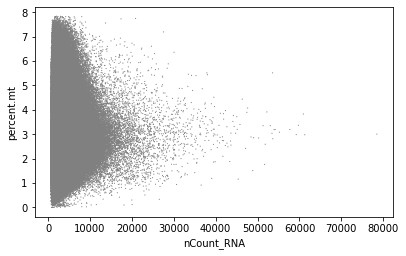

In [70]:
sc.pl.scatter(dat, x='nCount_RNA', y='percent.mt', size=5)

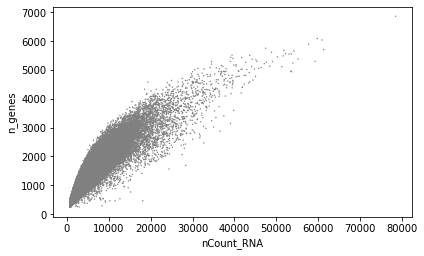

In [71]:
sc.pl.scatter(dat, x='nCount_RNA', y='n_genes', size=8)

In [72]:
#  filter cells with too many genes expressed
dat = dat[dat.obs["n_genes"] < 5000, :]  # 

#  filter cells that have >5% mitochondrial counts
dat = dat[dat.obs["percent.mt"] < 5, :]  # 1159468 × 28891

In [73]:
dat

View of AnnData object with n_obs × n_vars = 1159468 × 28891
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'donor_id', 'pool_number', 'predicted.celltype.l2', 'predicted.celltype.l2.score', 'age', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'n_genes'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'ensembl_id', 'n_cells'
    uns: 'cell_type_ontology_term_id_colors', 'default_embedding', 'schema_version', 'title'
    obsm: 'X_azimuth_spca', 'X_azimuth_umap', 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs

In [74]:
# normalize by total UMI count: scale factor (in-place change), CPM if target=1e6
sc.pp.normalize_total(dat, target_sum=1e6)

/Users/zixuanzhang/miniconda3/envs/jaxqtl/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [93]:
dat.X[0].mean()

34.612854

In [95]:
dat.var

,vst.mean,vst.variance,vst.variance.expected,vst.variance.standardized,vst.variable,feature_is_filtered,feature_reference,feature_biotype,ensembl_id,n_cells
feature_name,,,,,,,,,,
MIR1302-2HG,0.000003,0.000003,0.000003,0.985962,0,False,NCBITaxon:9606,gene,ENSG00000243485,4
RP11-34P13.7,0.000745,0.000746,0.000816,0.915122,0,False,NCBITaxon:9606,gene,ENSG00000238009,930
RP11-34P13.8,0.000018,0.000018,0.000019,0.972769,0,False,NCBITaxon:9606,gene,ENSG00000239945,23
RP11-34P13.13,0.001408,0.001411,0.001561,0.904056,0,False,NCBITaxon:9606,gene,ENSG00000241860,1756
RP11-34P13.9,0.000002,0.000002,0.000002,0.988659,0,False,NCBITaxon:9606,gene,ENSG00000241599,3
...,...,...,...,...,...,...,...,...,...,...
MT-ND4L,0.403797,0.501192,0.628665,0.797233,0,False,NCBITaxon:9606,gene,ENSG00000212907,381484
MT-ND4,9.792230,62.247295,72.017035,0.864341,0,False,NCBITaxon:9606,gene,ENSG00000198886,1228741
MT-ND5,2.628333,6.833800,9.005488,0.758848,0,False,NCBITaxon:9606,gene,ENSG00000198786,1027118
